### About DataSet - 
There are 13 attributes: 
1. Age: Age (in years) 
2. Sex: gender (1 = male; 0 = female)
3. ChestPain: Chest Pain type 
* 1: typical angina (all criteria present) 
* 2: atypical angina (two of three criteria satisfied) 
* 3: non-anginal pain (less than one criteria satisfied) 
* 4: asymptomatic (none of the criteria are satisfied) 
4. Restbps: Resting Blood pressure (in mmHg, upon admission to the hospital) 
5. Chol: serum cholesterol in mg/dL 
6. Fbs: fasting blood sugar > 120 mg/dL (likely to be diabetic) 
* 1 = true; 
* 0 = false 
7. RestECG: Resting electrocardiogram results 
* Value 0: normal 
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. MaxHR: Greatest number of beats per minute your heart can possibly reach during all-out strenuous exercise.
9. Exang: exercise induced angina (1 = yes; 0 = no) 
10. Oldpeak: ST depression induced by exercise relative to rest (in mm, achieved by subtracting the lowest ST segment points during exercise and rest) 
11. Slope: the slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia -- 
* Value 1: upsloping 
* Value 2: flat 
* Value 3: downsloping 
12. Ca: number of major vessels (0-3) colored by fluoroscopy. Major cardial vessels are as goes: aorta, superior vena cava, inferior vena cava, pulmonary artery (oxygen-poor blood --> lungs), pulmonary veins (oxygen-rich blood --> heart), and coronary arteries (supplies blood to heart tissue).

13. AHD: 
* 0 = normal; 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest); 
* 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test) 
14. Target: 0 = no disease, 1 = disease

In [1]:
# computation lib
import numpy as np
import pandas as pd
# Visualization lib
import matplotlib.pyplot as plt
import seaborn as sns
# model creation
from sklearn.metrics import accuracy_score
from fast_ml.model_development import train_valid_test_split


In [2]:
# importing datasets

dataset = pd.read_csv(r'Heart Attack Data Set.csv')

dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
dataset.shape

(303, 14)

In [6]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
dataset.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
dataset.fbs.unique()

array([1, 0], dtype=int64)

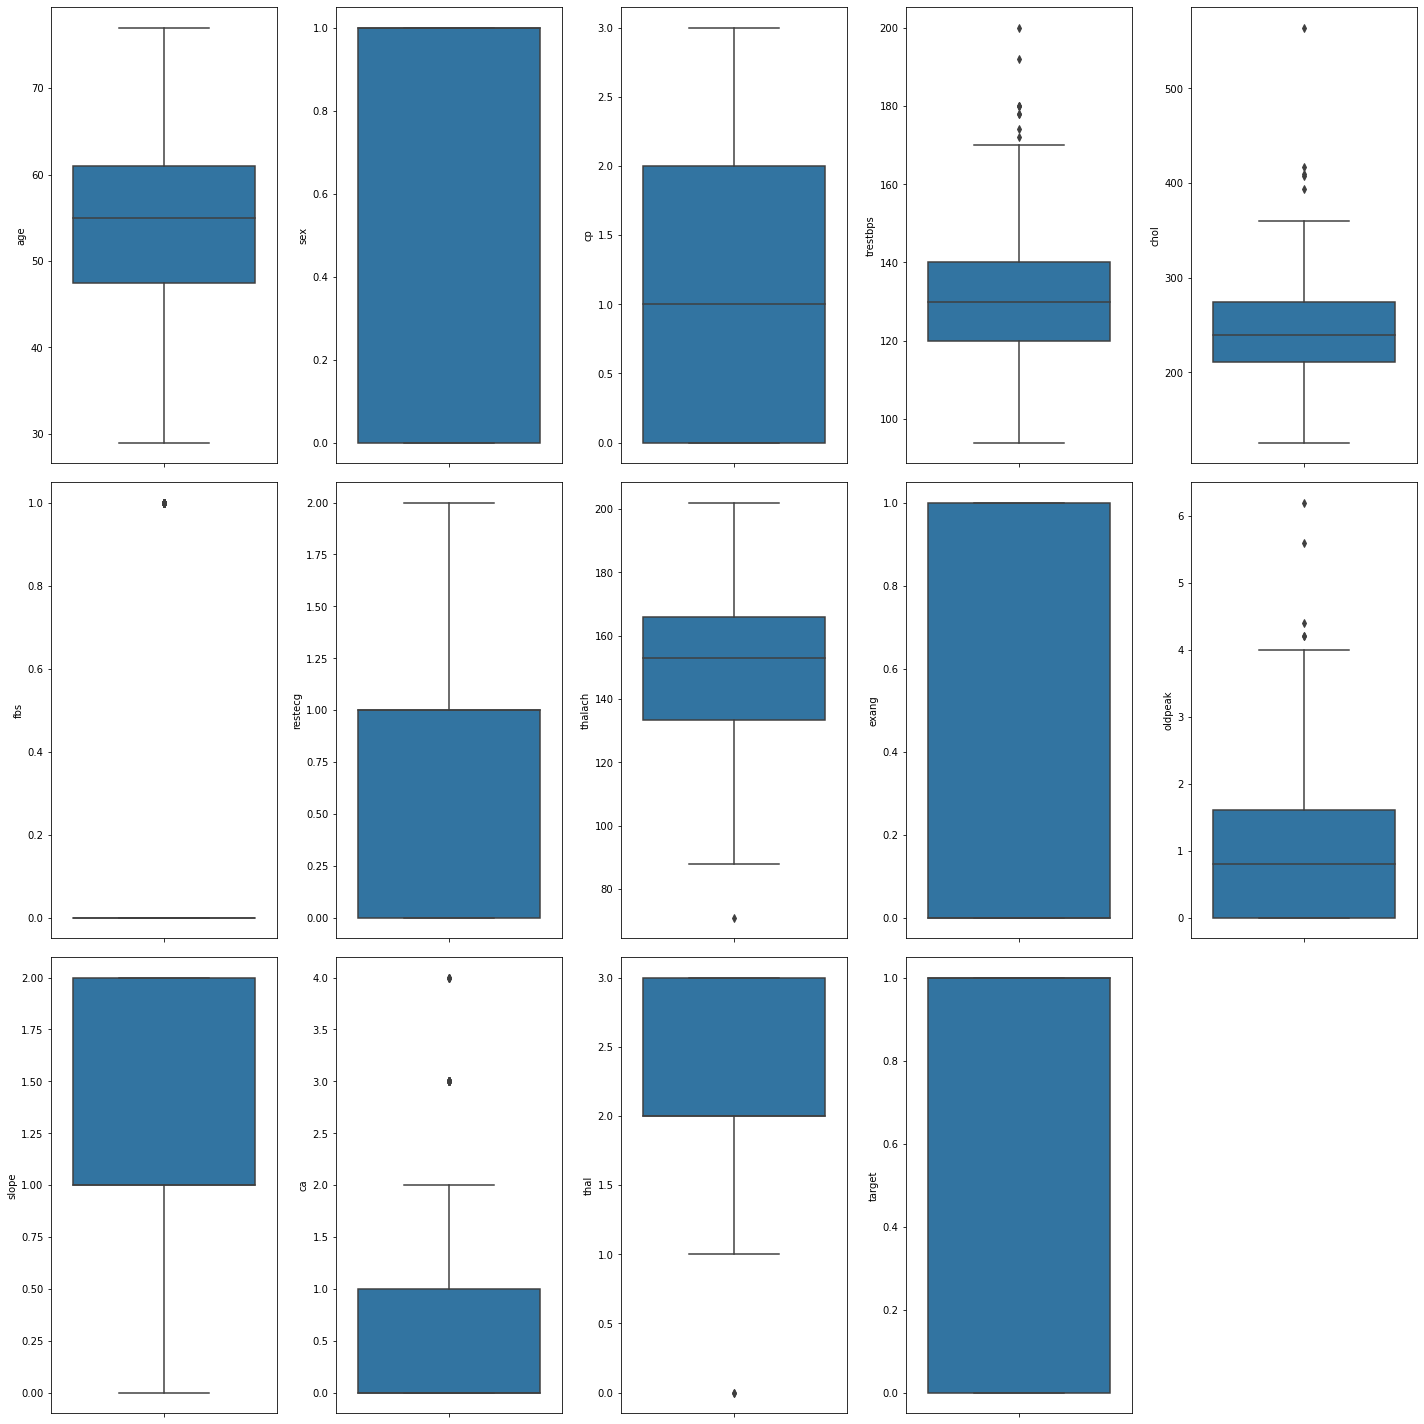

In [9]:
plt.figure(figsize=(20,20))
rows = 3
col = int(np.ceil(dataset.shape[1]/rows))
indexs = 1
for cols in dataset.columns:
    plt.subplot(rows,col,indexs)
    sns.boxplot(y=cols, data=dataset)
    indexs+=1
plt.tight_layout(pad=1.5)
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

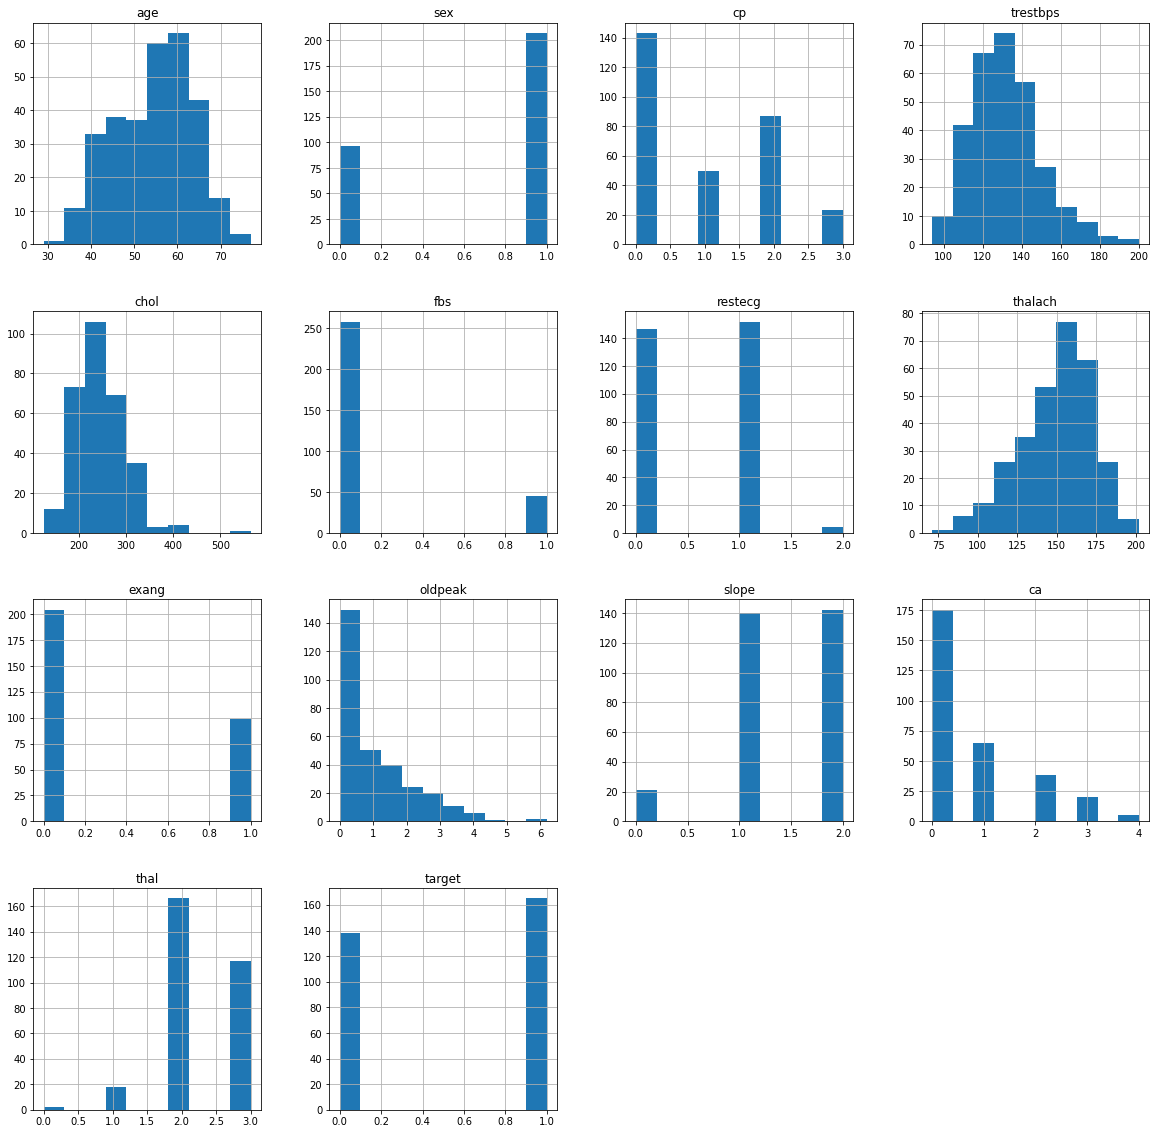

In [10]:
dataset.hist(figsize=(20,20))

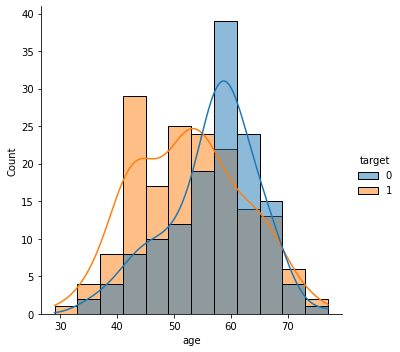

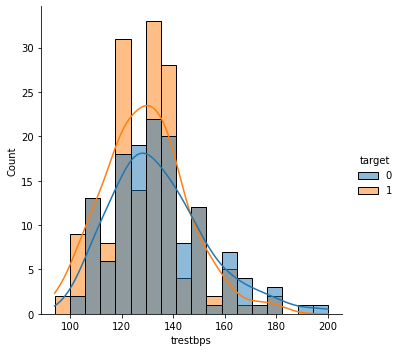

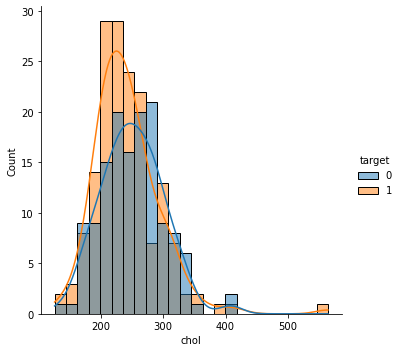

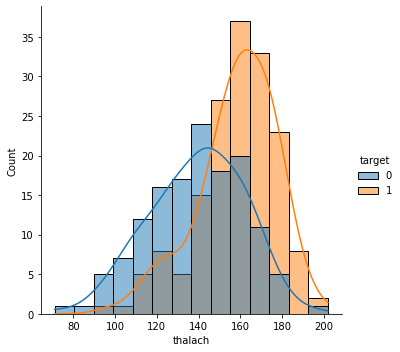

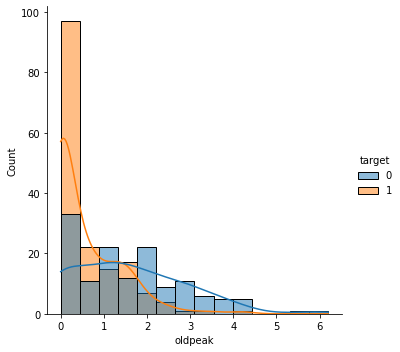

In [11]:
toplot = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for i in toplot:
    sns.displot(x=i, hue='target',data=dataset, kde=True)

<Figure size 720x720 with 0 Axes>

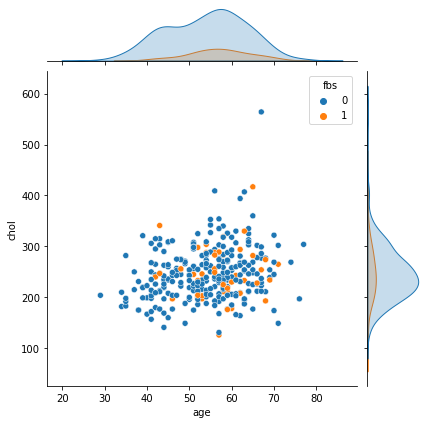

In [12]:
plt.figure(figsize=(10,10))
sns.jointplot(x = "age",y='chol', data = dataset, hue='fbs')

# Feature Normalization

In [13]:
continous_data = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for i in continous_data:
    mean=dataset[i].mean()
    deviation = dataset[i].std()
    dataset[i] = (dataset[i]-mean)/deviation


In [14]:
# vizualizing normalize dataset
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.950624,1,3,0.762694,-0.255910,1,0,0.015417,0,1.085542,0,0,1,1
1,-1.912150,1,2,-0.092585,0.072080,0,1,1.630774,0,2.119067,0,0,2,1
2,-1.471723,0,1,-0.092585,-0.815424,0,0,0.975900,0,0.310399,2,0,2,1
3,0.179877,1,1,-0.662770,-0.198030,0,1,1.237849,0,-0.206364,2,0,2,1
4,0.289984,0,0,-0.662770,2.078611,0,1,0.582975,1,-0.378618,2,0,2,1


In [15]:
# distribution of X and Y

X = dataset.drop('target',axis=1)
Y = dataset['target']
print(X.shape,Y.shape)

(303, 13) (303,)


In [16]:
X.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244


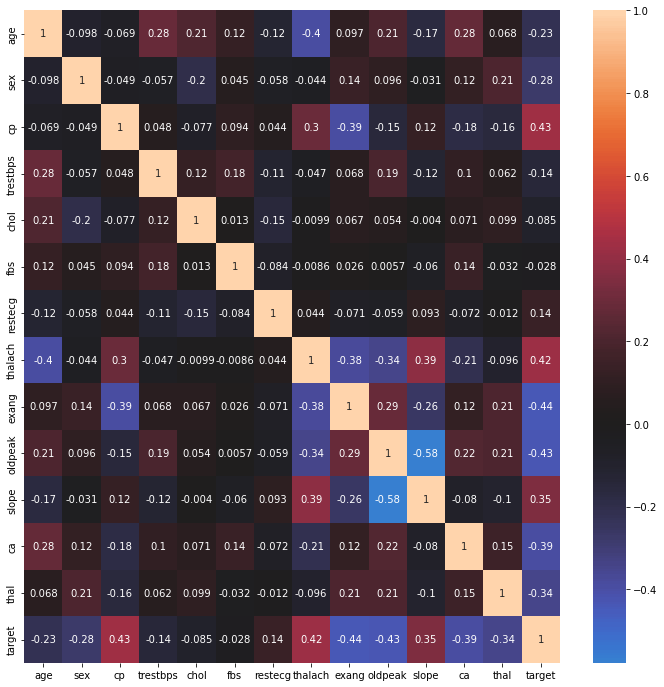

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(),center=0,annot=True)
plt.show()

In [18]:
dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

# distributing test and validation

In [19]:
xtrain,ytrain,xvalid,yvalid,xtest,ytest = train_valid_test_split(dataset,target='target', train_size=0.7, valid_size=0.15, test_size=0.15,method='random')

print("\n train",xtrain,ytrain,"\n valid",xvalid,yvalid,"\n test",xtest,ytest)


 train           age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
186  0.620304    1   0 -0.092585  0.129961    0        1 -0.246532      1   
136  0.620304    0   2 -0.662770 -1.317056    1        1 -2.342130      0   
73  -0.370656    1   0  0.477601  0.284309    0        0  1.587115      1   
52   0.840517    1   2 -0.092585 -0.294497    0        1 -0.159216      0   
222  1.170837    1   3  0.363564  0.689474    1        0  1.063216      0   
..        ...  ...  ..       ...       ...  ...      ...       ...    ...   
279  0.730411    1   0  0.363564 -1.548579    0        0 -1.076040      1   
301  0.289984    1   0 -0.092585 -2.223854    0        1 -1.512623      1   
206  0.510197    1   0 -1.232956 -0.140149    0        0 -0.333849      1   
210  0.289984    1   2 -0.206622 -0.333085    0        0  0.015417      0   
85   1.391051    0   2 -0.947863  6.130260    0        0  0.452000      0   

      oldpeak  slope  ca  thal  
186  0.310399      2   1     3  
1

In [20]:
len(dataset)

303